In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# August 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

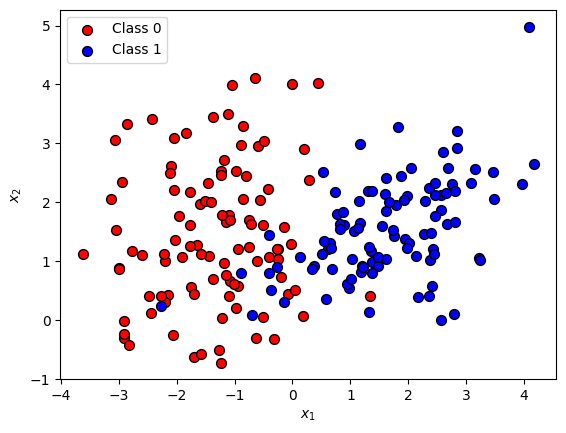

In [4]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', s=50, edgecolors='k', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', s=50, edgecolors='k', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('figures/soft_margin_dataset.pdf')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
def plot_svm_decision_boundary(model, X, y, feature_names=None, class_labels=None, ax=None, legend=True):
    """Plot the decision boundary, margin, and support vectors of an SVM classifier."""
    if feature_names is None:
        feature_names = ['$x_1$', '$x_2$']
    if class_labels is None:
        class_labels = ['Class 0', 'Class 1']
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', s=50, edgecolors='k', label=class_labels[0])
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', s=50, edgecolors='k', label=class_labels[1])
    
    # Create grid to evaluate model
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 250),
        np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 250)
    )
    grid = np.c_[x0.ravel(), x1.ravel()]

    # Plot the decision boundary and margins
    y_decision = model.decision_function(grid).reshape(x0.shape)
    ax.contour(x0, x1, y_decision, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Fill the class areas
    y_pred = model.predict(grid).reshape(x0.shape)
    custom_cmap = plt.cm.colors.ListedColormap(['red', 'blue'])
    ax.contourf(x0, x1, y_pred, alpha=0.3, cmap=custom_cmap)
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                   facecolors='none', edgecolors='black', label='support vectors') 

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    if legend:
        ax.legend()

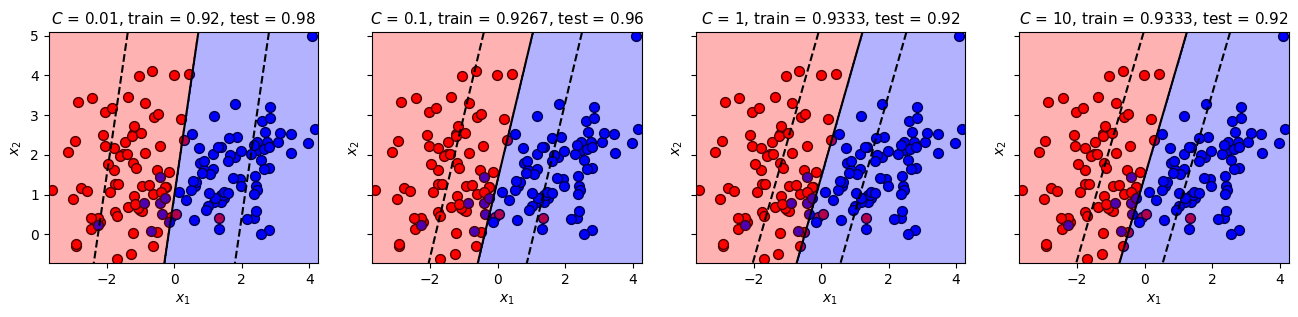

In [7]:
from sklearn.svm import LinearSVC

# Train LinearSVM models with various C values
fig, axes = plt.subplots(1, 4, figsize=(16, 3), sharey=True)

for ax, C in zip(axes, [0.01, 0.1, 1, 10]):
    model = LinearSVC(C=C, random_state=42)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Plot the decision boundaries and scores
    plot_svm_decision_boundary(model, X_train, y_train, ax=ax, legend=False) 
    ax.set_title(f'$C$ = {C}, train = {train_score:.4}, test = {test_score:.4}', fontsize=11)

plt.savefig('figures/soft_margin_svm.pdf', bbox_inches='tight')